## Creating the IR-transmission plot along with its derivative

0


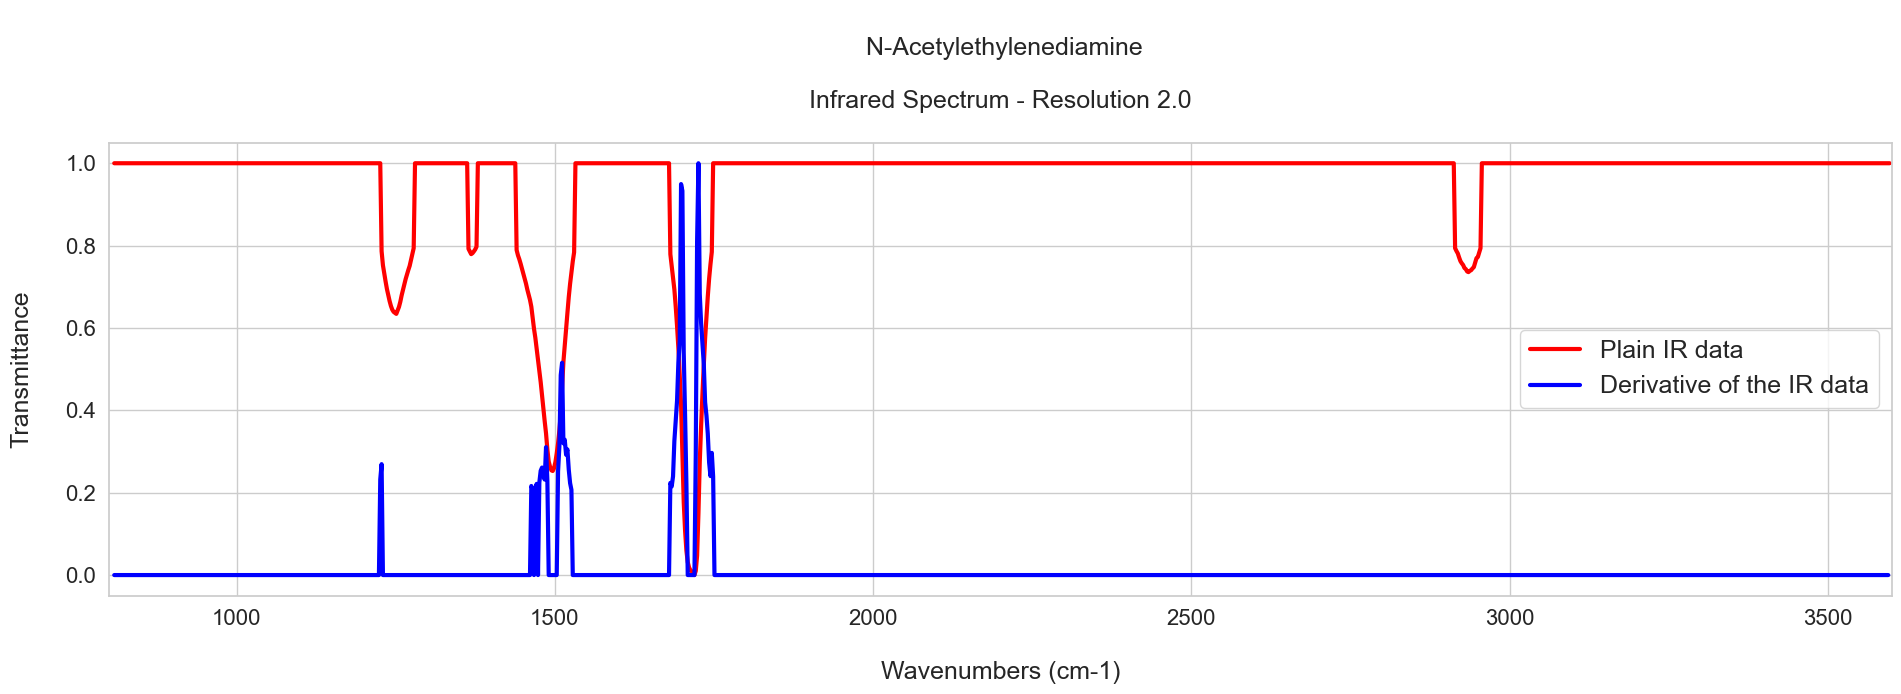

In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="bright")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# First let's load the CSV file
the_df = pd.read_csv("CSV files to work on/Final_csv_2_DerivativeThresh20_PlainThresh20_NumericalCorr.csv")

# Let's just read data for only one molecule. It's arbitrary which one
i=-1
for name in the_df["Name"]:
    i+=1
    if name == "N-Acetylethylenediamine":
        print(i)

molecule_data = the_df.iloc[0]
###############################

# Let's extract the plain data:
plain_indices = []
derivative_indices = []
for index in molecule_data.index:
    #It's index not column, because it's a series not a dataframe
    
    #It's easier to just exclude Cat data and Derivative data to obtain the plain data
    the_find_1 = re.findall("D", index)
    the_find_2 = re.findall("Cat", index)
    the_find_3 = re.findall("\d", index)
    
    if len(the_find_1) == 0 and len(the_find_2) == 0 and len(the_find_3) > 0:
        plain_indices.append(index)
        
    elif len(the_find_1) > 0 and len(the_find_3) > 0:
        derivative_indices.append(index)

molecule_data_plain = molecule_data[plain_indices]
molecule_data_derivative = molecule_data[derivative_indices]

x_plain = []
y_plain = []
# Making the plot of plain data
for index in molecule_data_plain.index:
    #Getting the numbers:
    the_find = re.findall("(\d+\.\d+)-(\d+\.\d+)", index)
    first_number = float(the_find[0][0])
    second_number = float(the_find[0][1])
    
    the_mean = second_number/2 + first_number/2
    x_plain.append(the_mean)
    
    #Getting y_data is simple
    y_plain.append(float(molecule_data_plain[index]))

x_derivative = []
y_derivative = []
for index in molecule_data_derivative.index:
    #Getting the numbers:
    the_find = re.findall("(\d+\.\d+)-(\d+\.\d+)", index)
    first_number = float(the_find[0][0])
    second_number = float(the_find[0][1])
    
    the_mean = second_number/2 + first_number/2
    x_derivative.append(the_mean)
    
    #Getting y_data is simple
    y_derivative.append(float(molecule_data_derivative[index]))
    
    
figure = plt.figure(figsize=(23, 6), dpi=100)

plain_color = (255/255, 0, 0)
plt.plot(x_plain, y_plain, linewidth=3, color=plain_color, label="Plain IR data")
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("\nWavenumbers (cm-1)", size=18)
plt.ylabel("Transmittance\n", size=18)
# Let's do the N-Acetylethylenediamine
# N-Acetylethylenediamine; Cas: 1001-53-2; SMILES: CC(=O)NCCN

plt.title("\n  N-Acetylethylenediamine \n\nInfrared Spectrum - Resolution 2.0\n", size=18)

derivative_color = (0,0, 255/255)
plt.plot(x_derivative, y_derivative, linewidth=3, color=derivative_color, label="Derivative of the IR data")
plt.legend(fontsize=18)

plt.xlim(800, 3600)
#plt.ylim(0, 0.2)
plt.show()
